In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# 1. Karakterkészlet
text = "hello world"
chars = sorted(list(set(text)))
vocab_size = len(chars)

# 2. Tokenizálás
stoi = {ch: i for i, ch in enumerate(chars)}
itos = {i: ch for ch, i in stoi.items()}

# 3. Egyszerű adat: minden karakter → következő karakter
xs = torch.tensor([stoi[c] for c in text[:-1]])  # input tokenek
ys = torch.tensor([stoi[c] for c in text[1:]])   # target tokenek

print(chars)
print(vocab_size)
print(stoi)
print(itos)
z = ''.join([itos[stoi[c]] for c in text[:-1]])
print( z ) 
print(xs)
print(ys)

[' ', 'd', 'e', 'h', 'l', 'o', 'r', 'w']
8
{' ': 0, 'd': 1, 'e': 2, 'h': 3, 'l': 4, 'o': 5, 'r': 6, 'w': 7}
{0: ' ', 1: 'd', 2: 'e', 3: 'h', 4: 'l', 5: 'o', 6: 'r', 7: 'w'}
hello worl
tensor([3, 2, 4, 4, 5, 0, 7, 5, 6, 4])
tensor([2, 4, 4, 5, 0, 7, 5, 6, 4, 1])


text:  hello world
chars:  [' ', 'd', 'e', 'h', 'l', 'o', 'r', 'w']
vocab size:  8
Stoi:  {' ': 0, 'd': 1, 'e': 2, 'h': 3, 'l': 4, 'o': 5, 'r': 6, 'w': 7}
Itos:  {0: ' ', 1: 'd', 2: 'e', 3: 'h', 4: 'l', 5: 'o', 6: 'r', 7: 'w'}
input tokenek (xs):  tensor([3, 2, 4, 4, 5, 0, 7, 5, 6, 4])
targer tokenek (ys):  tensor([2, 4, 4, 5, 0, 7, 5, 6, 4, 1])
súlymátrix:  tensor([[-2.1706e+00, -7.7657e-01, -9.5976e-01, -1.1265e+00, -9.8812e-01,
          2.0713e+00,  2.2980e-01, -4.2009e-01],
        [ 9.8172e-01,  2.1082e+00,  1.7848e+00,  4.0430e-02,  7.3593e-01,
         -8.6411e-01,  1.1408e+00,  5.0493e-01],
        [-1.5318e+00, -6.1831e-01, -1.1466e+00,  5.8367e-01, -2.2750e-01,
         -1.2222e+00,  3.2352e-01, -2.3383e-04],
        [-1.5076e+00, -5.3109e-03, -1.5933e+00, -4.6524e-01,  3.6826e-01,
         -2.3042e+00,  4.3953e-01,  6.0034e-01],
        [-1.3485e-01, -6.8874e-01, -7.0573e-01,  7.5434e-02, -3.1564e-01,
          4.1219e-01,  2.2716e+00, -9.2810e-01],
        [-9.1265e-01,  1

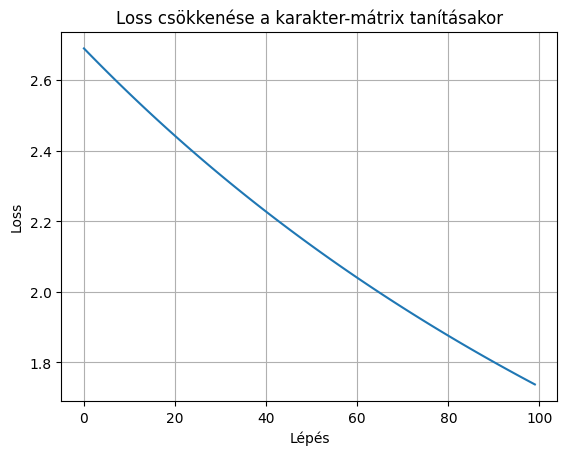

In [8]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# 1. Karakterkészlet
text = "hello world"
chars = sorted(list(set(text)))
vocab_size = len(chars)

# 2. Tokenizálás
stoi = {ch: i for i, ch in enumerate(chars)}

itos = {i: ch for ch, i in stoi.items()}

print("text: ", text)
print("chars: ", chars)
print("vocab size: ", vocab_size)
print("Stoi: " ,stoi)
print("Itos: " ,itos)

# 3. Egyszerű adat: minden karakter → következő karakter
xs = torch.tensor([stoi[c] for c in text[:-1]])  # input tokenek
ys = torch.tensor([stoi[c] for c in text[1:]])   # target tokenek
print("input tokenek (xs): ", xs)
print("targer tokenek (ys): ", ys)


# 4. Súlymátrix inicializálása (bigram logit predikció)
W = torch.randn((vocab_size, vocab_size), requires_grad=True)
print("súlymátrix: ", W)

# 5. Tanítási paraméterek
lr = 0.1
loss_history = []

# 6. Tréning ciklus
for step in range(100):
    # Előrefelé számolás
    logits = W[xs]                 # (T, vocab_size)
    loss = F.cross_entropy(logits, ys)

    # Loss mentése
    loss_history.append(loss.item())

    # Visszaterjesztés
    loss.backward()

    # Súlyfrissítés
    with torch.no_grad():
        W -= lr * W.grad
        W.grad.zero_()

    # Debug print
    if step % 10 == 0 or step == 99:
        print(f"Step {step+1:3d} | Loss: {loss.item():.4f}")

# 7. Loss görbe kirajzolása
plt.plot(loss_history)
plt.xlabel("Lépés")
plt.ylabel("Loss")
plt.title("Loss csökkenése a karakter-mátrix tanításakor")
plt.grid(True)
plt.show()


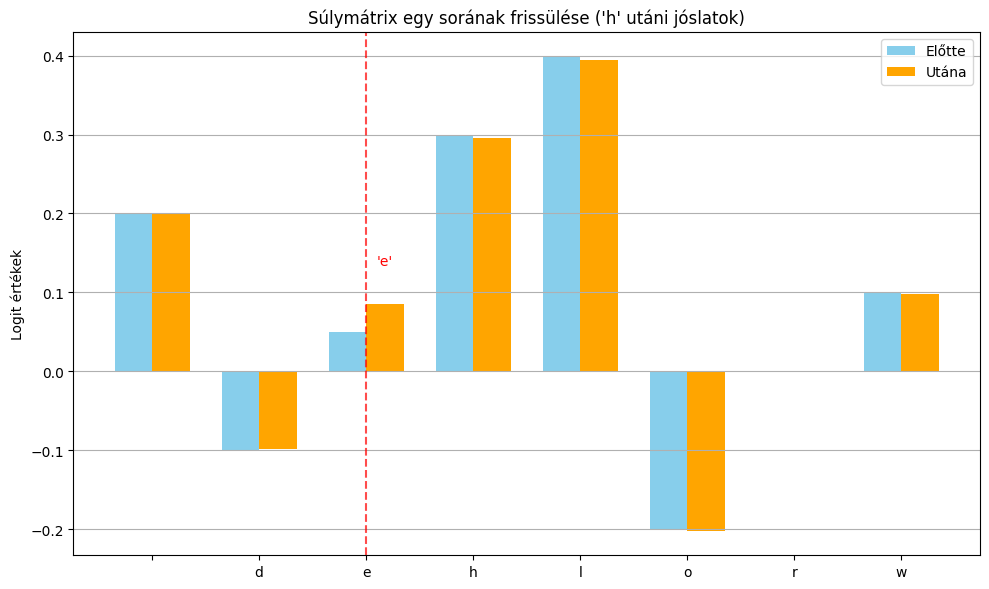

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Eredeti W sor (logitok egy karakterhez, pl. 'h')
W_before = np.array([0.2, -0.1, 0.05, 0.3, 0.4, -0.2, 0.0, 0.1])

# Gradiens értékek (loss.backward() után)
grad = np.array([0.01, -0.02, -0.35, 0.04, 0.05, 0.03, 0.01, 0.02])

# Tanulási ráta
lr = 0.1

# Frissített W sor
W_after = W_before - lr * grad

# Karakterek a szótárban (index szerint)
chars = [' ', 'd', 'e', 'h', 'l', 'o', 'r', 'w']
x = np.arange(len(chars))

plt.figure(figsize=(10, 6))
bar_width = 0.35

# Előtte
plt.bar(x - bar_width/2, W_before, bar_width, label='Előtte', color='skyblue')

# Utána
plt.bar(x + bar_width/2, W_after, bar_width, label='Utána', color='orange')

# Kiemeljük a cél karaktert ('e', index 2)
plt.axvline(2, color='red', linestyle='--', alpha=0.7)
plt.text(2 + 0.1, max(W_before[2], W_after[2]) + 0.05, "'e'", color='red')

# Jelölések
plt.xticks(x, chars)
plt.ylabel("Logit értékek")
plt.title("Súlymátrix egy sorának frissülése ('h' utáni jóslatok)")
plt.legend()
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()


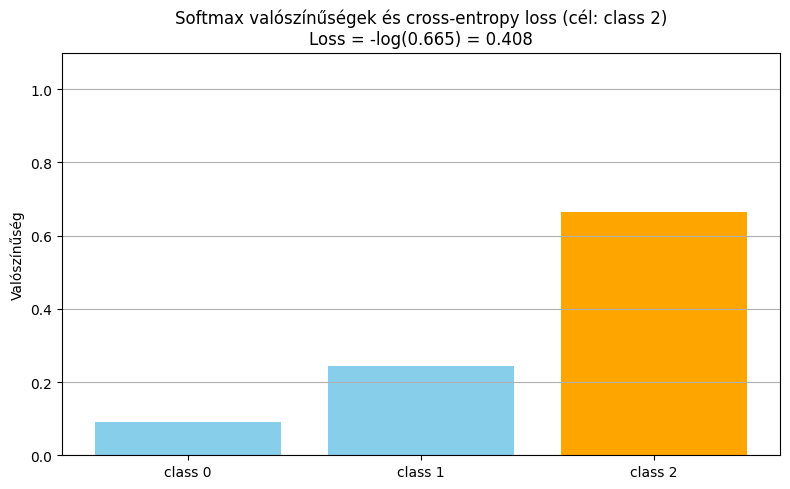

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Kézi példa:
logits = np.array([1.0, 2.0, 3.0])  # három logit érték
target_index = 2  # a 3. osztály (index = 2) a helyes válasz

# Softmax kiszámítása
exp_logits = np.exp(logits)
softmax = exp_logits / exp_logits.sum()

# Cross-entropy loss a célosztály szerint
p_target = softmax[target_index]
loss = -np.log(p_target)

# Vizualizáció
x = ['class 0', 'class 1', 'class 2']
plt.figure(figsize=(8, 5))
plt.bar(x, softmax, color=['skyblue', 'skyblue', 'orange'])
plt.title(f"Softmax valószínűségek és cross-entropy loss (cél: class 2)\nLoss = -log({p_target:.3f}) = {loss:.3f}")
plt.ylabel("Valószínűség")
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [12]:
import numpy as np

# Karakterek és tokenek
chars = sorted(list(set("hello world")))
stoi = {ch: i for i, ch in enumerate(chars)}
itos = {i: ch for ch, i in stoi.items()}

# Példa bemenet és cél
xs_str = "hel"
ys_str = "elo"
xs = [stoi[c] for c in xs_str]  # [3, 2, 4] → 'h', 'e', 'l'
ys = [stoi[c] for c in ys_str]  # [2, 4, 5] → 'e', 'l', 'o'

# Fixált súlymátrix logit értékekkel a példa kedvéért (vocab_size = 8)
W = np.array([
    [ 0.1, -0.2,  0.3, 0.0, -0.1,  0.2,  0.0, 0.0],  # ' ' → 'hello...'
    [ 0.0,  0.1, -0.2, 0.2,  0.0,  0.1, -0.1, 0.0],  # 'd'
    [ 0.3,  0.0,  0.1, 0.1,  1.0,  0.0,  0.0, 0.0],  # 'e'
    [ 0.1,  0.0,  0.9, 0.0,  0.2,  0.0,  0.0, 0.0],  # 'h' → cél: 'e'
    [-0.2,  0.1,  0.0, 0.0,  0.1,  0.9,  0.0, 0.0],  # 'l' → cél: 'o'
    [ 0.2,  0.0,  0.1, 0.0, -0.1,  0.2,  0.3, 0.1],  # 'o'
    [ 0.0,  0.1,  0.0, 0.0,  0.1,  0.0,  0.2, 0.0],  # 'r'
    [ 0.1,  0.0,  0.2, 0.1,  0.0,  0.0,  0.0, 0.1],  # 'w'
])

# Kiválasztjuk a releváns sorokat
logits = W[xs]  # shape: (3, 8)

# Softmax számítás soronként
exp_logits = np.exp(logits)
softmax = exp_logits / exp_logits.sum(axis=1, keepdims=True)

# Cél tokenek indexei
target_indices = ys

# Cél tokenek valószínűségei (softmax érték a megfelelő oszlopban)
p_targets = softmax[np.arange(len(xs)), target_indices]

# Cross-entropy loss soronként
losses = -np.log(p_targets)
average_loss = losses.mean()

# Összegyűjtés megjelenítéshez
import pandas as pd
import ace_tools as tools

df = pd.DataFrame({
    "input_char": [itos[i] for i in xs],
    "target_char": [itos[i] for i in ys],
    "target_index": ys,
    "p_target (softmax)": p_targets,
    "loss = -log(p_target)": losses
})

tools.display_dataframe_to_user(name="Logits és cross-entropy példa", dataframe=df)

average_loss


ModuleNotFoundError: No module named 'ace_tools'